In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Dataset/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Select relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
# Choose the number of clusters (you may need to adjust this)
k = 3

In [10]:
# Create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

In [11]:
# Fit the model to the data
kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [12]:
# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

In [13]:
# Print the cluster centers (optional)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[40.39473684 87.         18.63157895]
 [40.32520325 44.15447154 49.82926829]
 [32.69230769 86.53846154 82.12820513]]


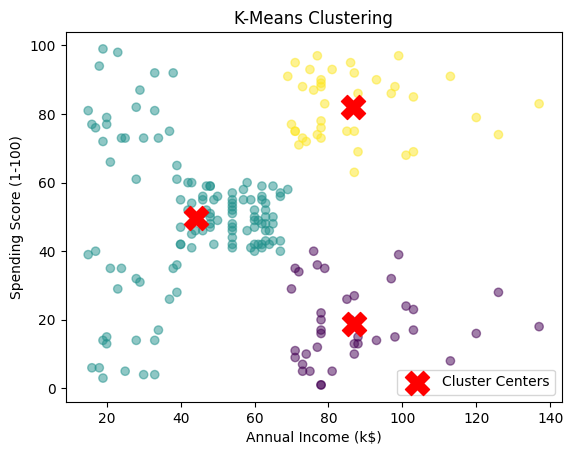

In [14]:
# Visualize the clusters (2D plot, considering two features at a time)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [15]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 143342.751571706


In [16]:
from sklearn.metrics import silhouette_score
# Assuming 'features' is your feature matrix
silhouette_avg = silhouette_score(features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3839349967742105
